### Adolescent

In [81]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_cd87a37f3bd0462dafb8e4c8b6f13af6.csv"
missing_values=["?"]
df=pd.read_csv(url,header=None,na_values=missing_values)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,NaN,no,no,AmericanSamoa,no,2,'12-16 years',NaN,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,NaN,no,no,Albania,no,7,'12-16 years',NaN,YES


In [82]:
df.shape

(104, 21)

In [83]:
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
dtype: bool

In [84]:
df=df.fillna(df.mode())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,NaN,no,no,AmericanSamoa,no,2,'12-16 years',NaN,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,NaN,no,no,Albania,no,7,'12-16 years',NaN,YES


In [85]:
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
dtype: bool

In [86]:
df_m=pd.DataFrame(df.isna().any()).rename(columns={0:"Missing"})
df_m=df_m[df_m["Missing"]==True]
df_m

,Missing
12,True
19,True


In [87]:
df_12=pd.DataFrame(df.iloc[:,12])
df_12.mode()

,12
0,White-European


In [88]:
df_12=df_12.fillna("White-European")
df_12

,12
0,Hispanic
1,Black
2,White-European
3,White-European
4,White-European
...,...
99,'Middle Eastern '
100,Asian
101,White-European
102,White-European


In [89]:
df_19=pd.DataFrame(df.iloc[:,19])
df_19.mode()

,19
0,Self


In [90]:
df_19=df_19.fillna("Self")
df_19

,19
0,Parent
1,Relative
2,Self
3,Self
4,Self
...,...
99,Parent
100,Parent
101,Self
102,Self


In [91]:
df_11=df.iloc[:,0:12]
df_13=df.iloc[:,13:19]

In [92]:
X=pd.concat([df_11,df_12,df_13,df_19],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent
1,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,Austria,no,2,'12-16 years',Relative
2,0,0,0,0,0,0,0,0,1,1,12,f,White-European,no,no,AmericanSamoa,no,2,'12-16 years',Self
3,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self
4,1,1,1,1,1,1,1,0,0,0,16,f,White-European,no,no,Albania,no,7,'12-16 years',Self


In [93]:
X.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [94]:
X.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11    object
12    object
13    object
14    object
15    object
16    object
17     int64
18    object
19    object
dtype: object

In [95]:
integers1=X.iloc[:,0:11]
integers2=pd.DataFrame(X.iloc[:,17])
integers=pd.concat([integers1,integers2],axis=1)

In [96]:
objects1=X.iloc[:,11:17]
objects2=X.iloc[:,18:20]
objects=pd.concat([objects1,objects2],axis=1)

In [97]:
from sklearn.preprocessing import LabelEncoder
objects=objects.apply(LabelEncoder().fit_transform)
objects.head()

,11,12,13,14,15,16,18,19
0,1,4,1,1,12,0,1,2
1,1,3,0,0,12,0,1,3
2,0,7,0,0,8,0,1,4
3,0,7,0,0,3,0,1,4
4,0,7,0,0,7,0,1,4


In [98]:
X=pd.concat([integers,objects],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,17,11,12,13,14,15,16,18,19
0,0,0,0,1,1,1,1,1,1,0,15,6,1,4,1,1,12,0,1,2
1,0,0,0,0,0,0,0,0,1,1,15,2,1,3,0,0,12,0,1,3
2,0,0,0,0,0,0,0,0,1,1,12,2,0,7,0,0,8,0,1,4
3,0,1,1,1,1,1,0,1,1,0,14,7,0,7,0,0,3,0,1,4
4,1,1,1,1,1,1,1,0,0,0,16,7,0,7,0,0,7,0,1,4


In [99]:
y=pd.DataFrame(df.iloc[:,20])
y.head()

,20
0,NO
1,NO
2,NO
3,YES
4,YES


In [100]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
11,0.675435
4,0.182254
3,0.134119
2,0.105151
9,0.088310
7,0.070525
5,0.055165
8,0.046422
10,0.033590
17,0.032303


In [101]:
scores=scores[scores["scores"]>0]
scores

,scores
11,0.675435
4,0.182254
3,0.134119
2,0.105151
9,0.088310
7,0.070525
5,0.055165
8,0.046422
10,0.033590
17,0.032303


In [102]:
X=X.iloc[:,scores.index]
X.head()

,17,4,3,2,9,7,5,8,10,16,0,19,6,12,1
0,6,1,1,0,0,1,1,1,15,0,0,2,1,4,0
1,2,0,0,0,1,0,0,1,15,0,0,3,0,3,0
2,2,0,0,0,1,0,0,1,12,0,0,4,0,7,0
3,7,1,1,1,0,1,1,1,14,0,0,4,0,7,1
4,7,1,1,1,0,0,1,0,16,0,1,4,1,7,1


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(83, 15)
(21, 15)


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(loss='deviance',learning_rate=0.001,n_estimators=5000,subsample=0.15,max_features='sqrt',criterion="mse",max_depth=45,min_samples_split=2,min_samples_leaf=1,warm_start=True,validation_fraction=0.1,random_state=0).fit(X_train,y_train)
gradient

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(criterion='mse', learning_rate=0.001, max_depth=45,
                           max_features='sqrt', n_estimators=5000,
                           random_state=0, subsample=0.15, warm_start=True)

In [106]:
from sklearn.metrics import accuracy_score
y0_pred=gradient.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=gradient.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  1.0
Accuracy on test data is:  1.0


Confusion matrix, without normalization
[[ 8  0]
 [ 0 13]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


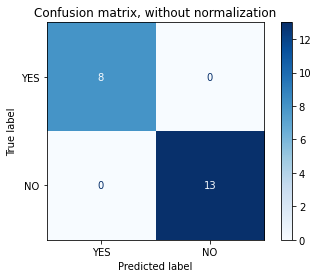

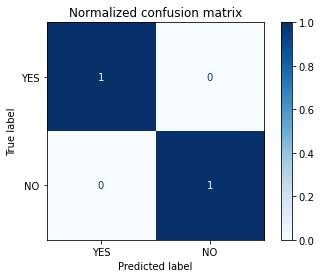

In [107]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [108]:
from sklearn.metrics import classification_report
print("Classification report on train data for the adolescent dataset: \n",classification_report(y_train,y0_pred))

Classification report on train data for the adolescent dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00        33
         YES       1.00      1.00      1.00        50

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [109]:
from sklearn.metrics import classification_report
print("Classification report on test data for the adolescent dataset: \n",classification_report(y_test,y1_pred))

Classification report on test data for the adolescent dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00         8
         YES       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Children

In [113]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_39529b873dfb41ad9bce4e6d35c1f543.csv"
missing_values=["?"]
df=pd.read_csv(url,header=None,na_values=missing_values)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


In [114]:
df.shape

(292, 21)

In [46]:
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
dtype: bool

In [47]:
m=pd.DataFrame(df.isna().any()).rename(columns={0:"Missing"})
m=m[m["Missing"]==True]
m

,Missing
10,True
12,True
19,True


In [48]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10    float64
11     object
12     object
13     object
14     object
15     object
16     object
17      int64
18     object
19     object
20     object
dtype: object

In [49]:
df_10=pd.DataFrame(df.iloc[:,10])
df_10.median()

10    6.0
dtype: float64

In [50]:
df_10=df_10.fillna(6.0)
df_10.isna().sum()

10    0
dtype: int64

In [51]:
df_12=pd.DataFrame(df.iloc[:,12])
df_12.mode()

,12
0,White-European


In [52]:
df_12=df_12.fillna("White-European")
df_12.isna().sum()

12    0
dtype: int64

In [53]:
df_19=pd.DataFrame(df.iloc[:,19])
df_19.mode()

,19
0,Parent


In [54]:
df_19=df_19.fillna("Parent")
df_19.isna().sum()

19    0
dtype: int64

In [55]:
df_1=df.iloc[:,0:10]
df_11=pd.DataFrame(df.iloc[:,11])
df_13=df.iloc[:,13:19]

In [44]:
X=pd.concat([df_1,df_10,df_11,df_12,df_13,df_19],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5,'4-11 years',Parent
1,1,1,0,0,1,1,0,1,0,0,6.0,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent
2,1,1,0,0,0,1,1,1,0,0,6.0,m,White-European,no,no,Jordan,yes,5,'4-11 years',Parent
3,0,1,0,0,1,1,0,0,0,1,5.0,f,White-European,yes,no,Jordan,no,4,'4-11 years',Parent
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,'United States',no,10,'4-11 years',Parent


In [56]:
objects=X.iloc[:,11:20]
objects.head()

,11,12,13,14,15,16,17,18,19
0,m,Others,no,no,Jordan,no,5,'4-11 years',Parent
1,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent
2,m,White-European,no,no,Jordan,yes,5,'4-11 years',Parent
3,f,White-European,yes,no,Jordan,no,4,'4-11 years',Parent
4,m,Others,yes,no,'United States',no,10,'4-11 years',Parent


In [57]:
from sklearn.preprocessing import LabelEncoder
objects=objects.apply(LabelEncoder().fit_transform)
objects.head()

,11,12,13,14,15,16,17,18,19
0,1,6,0,0,32,0,5,0,1
1,1,0,0,0,32,0,5,0,1
2,1,9,0,0,32,1,5,0,1
3,0,9,1,0,32,0,4,0,1
4,1,6,1,0,9,0,10,0,1


In [58]:
numbers=X.iloc[:,0:11]
numbers.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,0,0,1,1,0,1,0,0,6.0
1,1,1,0,0,1,1,0,1,0,0,6.0
2,1,1,0,0,0,1,1,1,0,0,6.0
3,0,1,0,0,1,1,0,0,0,1,5.0
4,1,1,1,1,1,1,1,1,1,1,5.0


In [59]:
X=pd.concat([numbers,objects],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,0,0,1,1,0,1,0,0,6.0,1,6,0,0,32,0,5,0,1
1,1,1,0,0,1,1,0,1,0,0,6.0,1,0,0,0,32,0,5,0,1
2,1,1,0,0,0,1,1,1,0,0,6.0,1,9,0,0,32,1,5,0,1
3,0,1,0,0,1,1,0,0,0,1,5.0,0,9,1,0,32,0,4,0,1
4,1,1,1,1,1,1,1,1,1,1,5.0,1,6,1,0,9,0,10,0,1


In [60]:
y=pd.DataFrame(df.iloc[:,20])
y.head()

,20
0,NO
1,NO
2,NO
3,NO
4,YES


In [69]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
17,0.694276
7,0.141160
3,0.137735
5,0.131930
8,0.122995
9,0.093763
0,0.065637
15,0.063240
1,0.056804
2,0.048986


In [70]:
scores=scores[scores["scores"]>0]
scores

,scores
17,0.694276
7,0.141160
3,0.137735
5,0.131930
8,0.122995
9,0.093763
0,0.065637
15,0.063240
1,0.056804
2,0.048986


In [72]:
X=X.iloc[:,scores.index]
X.head()

,17,7,3,5,8,9,0,15,1,2,6,4,12,19,10
0,5,1,0,1,0,0,1,32,1,0,0,1,6,1,6.0
1,5,1,0,1,0,0,1,32,1,0,0,1,0,1,6.0
2,5,1,0,1,0,0,1,32,1,0,1,0,9,1,6.0
3,4,0,0,1,0,1,0,32,1,0,0,1,9,1,5.0
4,10,1,1,1,1,1,1,9,1,1,1,1,6,1,5.0


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(233, 15)
(59, 15)


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gradient2=GradientBoostingClassifier(loss='deviance',learning_rate=0.001,n_estimators=5000,subsample=0.15,max_features='sqrt',criterion="mse",max_depth=45,min_samples_split=2,min_samples_leaf=1,warm_start=True,validation_fraction=0.1,random_state=0).fit(X_train,y_train)
gradient2

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(criterion='mse', learning_rate=0.001, max_depth=45,
                           max_features='sqrt', n_estimators=5000,
                           random_state=0, subsample=0.15, warm_start=True)

In [75]:
from sklearn.metrics import accuracy_score
y0_pred=gradient2.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=gradient2.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  1.0
Accuracy on test data is:  1.0


Confusion matrix, without normalization
[[39  0]
 [ 0 20]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


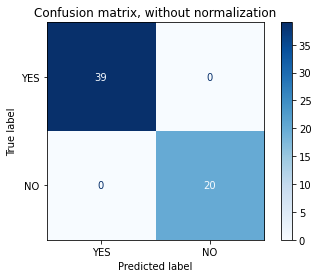

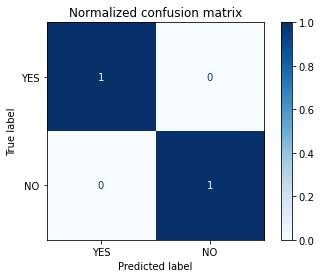

In [76]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [79]:
from sklearn.metrics import classification_report
print("Classification report on train data for the children's dataset: \n",classification_report(y_train,y0_pred))

Classification report on train data for the children's dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       112
         YES       1.00      1.00      1.00       121

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [80]:
from sklearn.metrics import classification_report
print("Classification report on test data for the children's dataset: \n",classification_report(y_test,y1_pred))

Classification report on test data for the children's dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00        39
         YES       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### Adults

In [115]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_7a028998105f4becbb8cd8690b60c125.csv"
missing_values=["?"]
df=pd.read_csv(url,header=None,na_values=missing_values)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [116]:
df.shape

(704, 21)

In [117]:
m=pd.DataFrame(df.isna().any()).rename(columns={0:"Missing"})
m=m[m["Missing"]==True]
m

,Missing
10,True
12,True
19,True


In [118]:
df.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10    float64
11     object
12     object
13     object
14     object
15     object
16     object
17      int64
18     object
19     object
20     object
dtype: object

In [119]:
df_10=pd.DataFrame(df.iloc[:,10])
df_10.median()

10    27.0
dtype: float64

In [120]:
df_10=df_10.fillna(27.0)
df_10.isna().any()

10    False
dtype: bool

In [121]:
df_12=pd.DataFrame(df.iloc[:,12])
df_12.mode()

,12
0,White-European


In [122]:
df_12=df_12.fillna("White-European")
df_12.isna().any()

12    False
dtype: bool

In [123]:
df_19=pd.DataFrame(df.iloc[:,19])
df_19.mode()

,19
0,Self


In [124]:
df_19=df_19.fillna("Self")
df_19.isna().any()

19    False
dtype: bool

In [125]:
df_1=df.iloc[:,0:10]
df_11=pd.DataFrame(df.iloc[:,11])
df_13=df.iloc[:,13:19]

In [126]:
X=pd.concat([df_1,df_10,df_11,df_12,df_13,df_19],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,White-European,no,no,Egypt,no,2,'18 and more',Self


In [127]:
objects=X.iloc[:,11:20]
objects.head()

,11,12,13,14,15,16,17,18,19
0,f,White-European,no,no,'United States',no,6,'18 and more',Self
1,m,Latino,no,yes,Brazil,no,5,'18 and more',Self
2,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent
3,f,White-European,no,yes,'United States',no,6,'18 and more',Self
4,f,White-European,no,no,Egypt,no,2,'18 and more',Self


In [128]:
from sklearn.preprocessing import LabelEncoder
objects=objects.apply(LabelEncoder().fit_transform)
objects.head()

,11,12,13,14,15,16,17,18,19
0,0,9,0,0,10,0,6,0,4
1,1,5,0,1,25,0,5,0,4
2,1,5,1,1,61,0,8,0,2
3,0,9,0,1,10,0,6,0,4
4,0,9,0,0,32,0,2,0,4


In [129]:
numbers=X.iloc[:,0:11]
numbers.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,1,0,0,1,1,0,0,26.0
1,1,1,0,1,0,0,0,1,0,1,24.0
2,1,1,0,1,1,0,1,1,1,1,27.0
3,1,1,0,1,0,0,1,1,0,1,35.0
4,1,0,0,0,0,0,0,1,0,0,40.0


In [130]:
X=pd.concat([numbers,objects],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,10,0,6,0,4
1,1,1,0,1,0,0,0,1,0,1,24.0,1,5,0,1,25,0,5,0,4
2,1,1,0,1,1,0,1,1,1,1,27.0,1,5,1,1,61,0,8,0,2
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,10,0,6,0,4
4,1,0,0,0,0,0,0,1,0,0,40.0,0,9,0,0,32,0,2,0,4


In [131]:
y=pd.DataFrame(df.iloc[:,20])
y.head()

,20
0,NO
1,NO
2,YES
3,NO
4,NO


In [132]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=mutual_info_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
17,0.582438
8,0.219397
5,0.190313
4,0.151598
2,0.122287
3,0.101707
15,0.085621
6,0.073798
9,0.064494
0,0.054583


In [133]:
scores=scores[scores["scores"]>0]
scores

,scores
17,0.582438
8,0.219397
5,0.190313
4,0.151598
2,0.122287
3,0.101707
15,0.085621
6,0.073798
9,0.064494
0,0.054583


In [134]:
X=X.iloc[:,scores.index]
X.head()

,17,8,5,4,2,3,15,6,9,0,10,1,12,14,7,11,19,16
0,6,0,0,0,1,1,10,1,0,1,26.0,1,9,0,1,0,4,0
1,5,0,0,0,0,1,25,0,1,1,24.0,1,5,1,1,1,4,0
2,8,1,0,1,0,1,61,1,1,1,27.0,1,5,1,1,1,2,0
3,6,0,0,0,0,1,10,1,1,1,35.0,1,9,1,1,0,4,0
4,2,0,0,0,0,0,32,0,0,1,40.0,0,9,0,1,0,4,0


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(563, 18)
(141, 18)


In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gradient3=GradientBoostingClassifier(loss='deviance',learning_rate=0.001,n_estimators=5000,subsample=0.15,max_features='sqrt',criterion="mse",max_depth=45,min_samples_split=2,min_samples_leaf=1,warm_start=True,validation_fraction=0.1,random_state=0).fit(X_train,y_train)
gradient3

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier(criterion='mse', learning_rate=0.001, max_depth=45,
                           max_features='sqrt', n_estimators=5000,
                           random_state=0, subsample=0.15, warm_start=True)

In [137]:
from sklearn.metrics import accuracy_score
y0_pred=gradient3.predict(X_train)
print("Accuracy on train data is: ",accuracy_score(y_train,y0_pred))
y1_pred=gradient3.predict(X_test)
print("Accuracy on test data is: ",accuracy_score(y_test,y1_pred))

Accuracy on train data is:  1.0
Accuracy on test data is:  1.0


Confusion matrix, without normalization
[[105   0]
 [  0  36]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


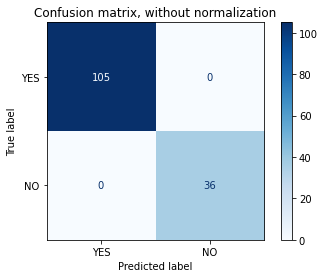

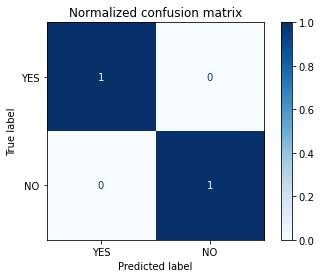

In [138]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=["YES","NO"]
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [139]:
from sklearn.metrics import classification_report
print("Classification report on train data for the adult dataset: \n",classification_report(y_train,y0_pred))

Classification report on train data for the adult dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       410
         YES       1.00      1.00      1.00       153

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



In [140]:
print("Classification report on test data for the adult dataset: \n",classification_report(y_test,y1_pred))

Classification report on test data for the adult dataset: 
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00       105
         YES       1.00      1.00      1.00        36

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

